In [3]:
%pylab inline
rcParams['font.size']=18

Populating the interactive namespace from numpy and matplotlib


In [53]:
ts1 = np.random.randn(2**18).astype('complex')
ts2 = np.random.randn(2**18).astype('complex')
f = np.fft.fftfreq(2**18)[:2**17+1]
redf = (f**(-0.5))*np.exp(1j*np.random.rand(2**17+1)*2*np.pi)
redf[0] = 0
redf[-1] = 0
red = np.fft.irfft(redf)
linesf = np.zeros_like(redf)
line_amp = 1e4
phases = np.exp(1j*np.random.rand(8)*2*np.pi)
for k in range(1):
    linesf[k+550*np.arange(1,9,dtype='int')]= line_amp*phases/(np.arange(1,9))
#linesf[551*np.arange(1,9,dtype='int')]= line_amp*.9/np.arange(1,9)

lines = np.fft.irfft(linesf)

devf = np.zeros_like(redf)
devf = np.exp(1j*np.random.rand(2**17+1)*2*np.pi)*np.sqrt(1/(1+(f*16)**2))
devf[0] = 0
devf[-1] = 0
device = np.fft.irfft(devf)*1e3

/home/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in power
/home/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


In [52]:
redf[-1]

(nan+nan*j)

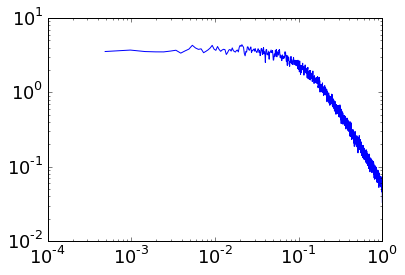

In [48]:
pxx,fr =  mlab.psd((device+ts1/1000.).real,NFFT=2**12)
loglog(fr,pxx)

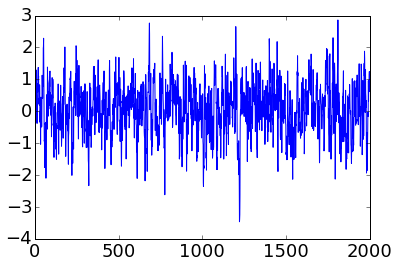

In [86]:
plot(device[:2000])

In [3]:
red.shape

(262144,)

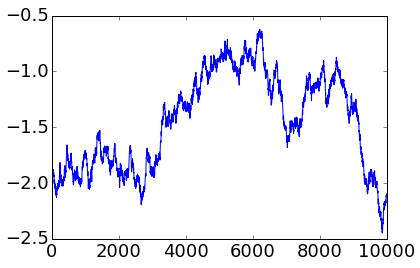

In [4]:
plot(red_line[:10000])

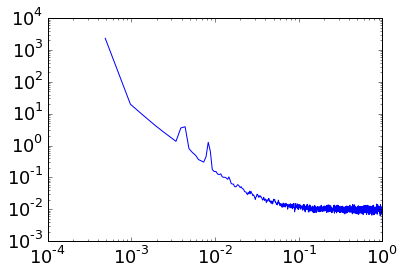

In [5]:
pxx,fr = mlab.psd((red_line+ts1/10).real,NFFT=2**12)
loglog(fr,pxx)

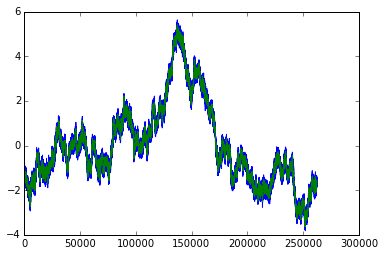

In [26]:
plot((red+ts1/10).real)
plot(red)

In [41]:
import kid_readout.analysis.cross_spectrum
reload(kid_readout.analysis.cross_spectrum)

<module 'kid_readout.analysis.cross_spectrum' from '/home/gjones/readout/kid_readout/kid_readout/analysis/cross_spectrum.py'>

0.249504792475


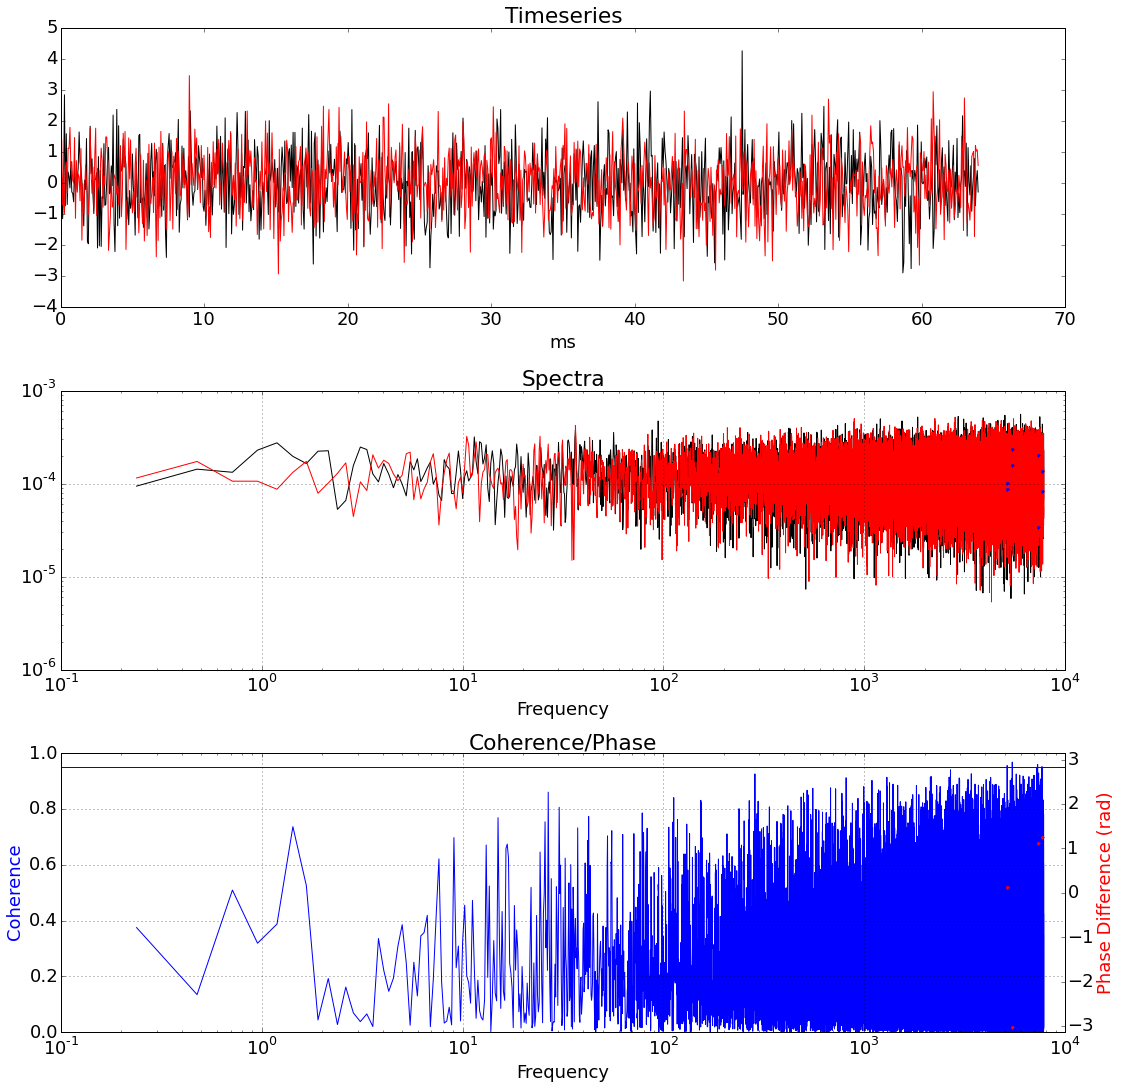

In [42]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(ts1,ts2)
cs.plot()

0.251603084526


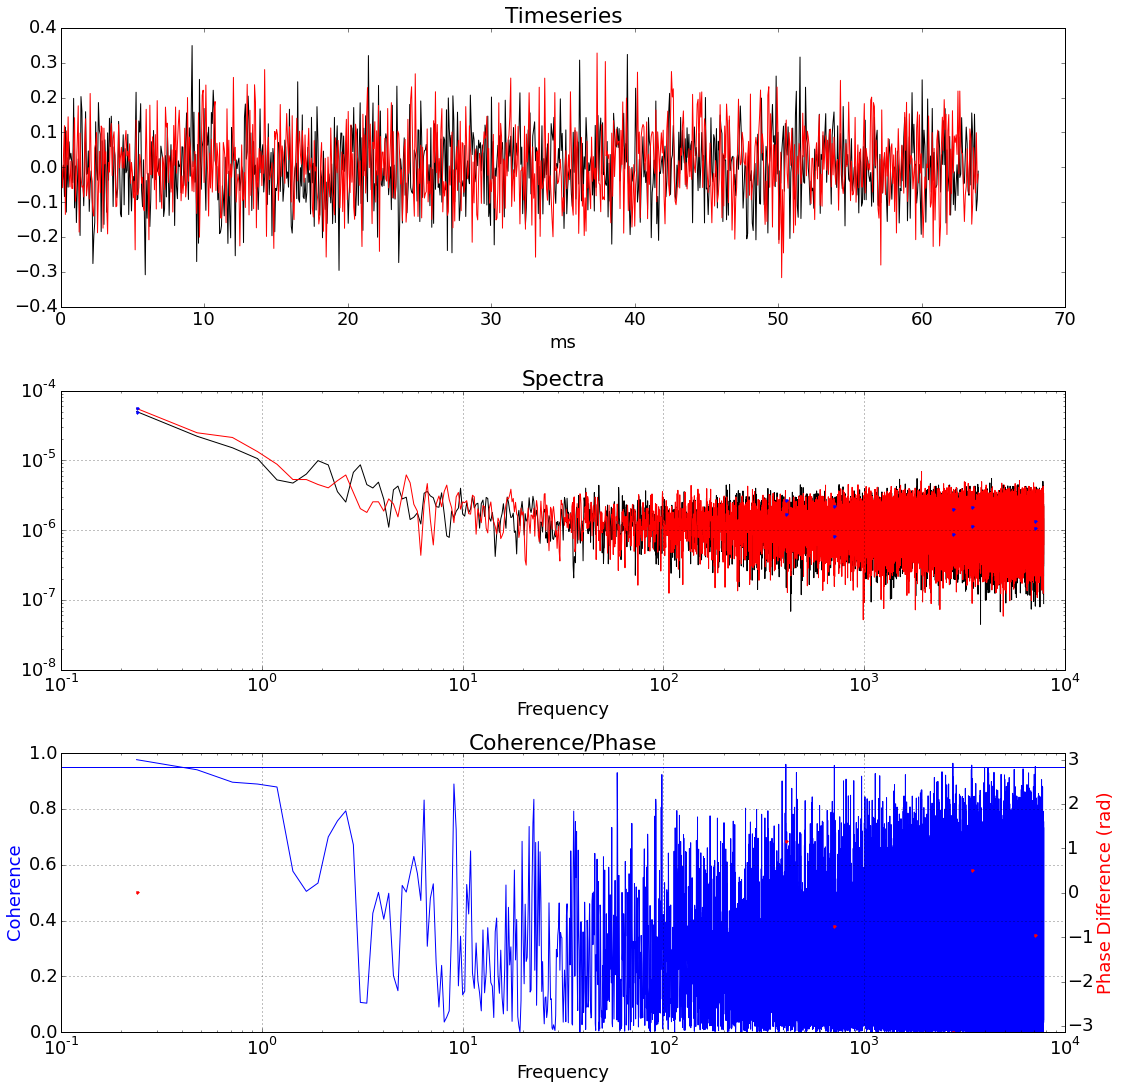

In [54]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+ts1/10.,red+ts2/10.)
cs.plot()

0.251603084526
0.0163124053152


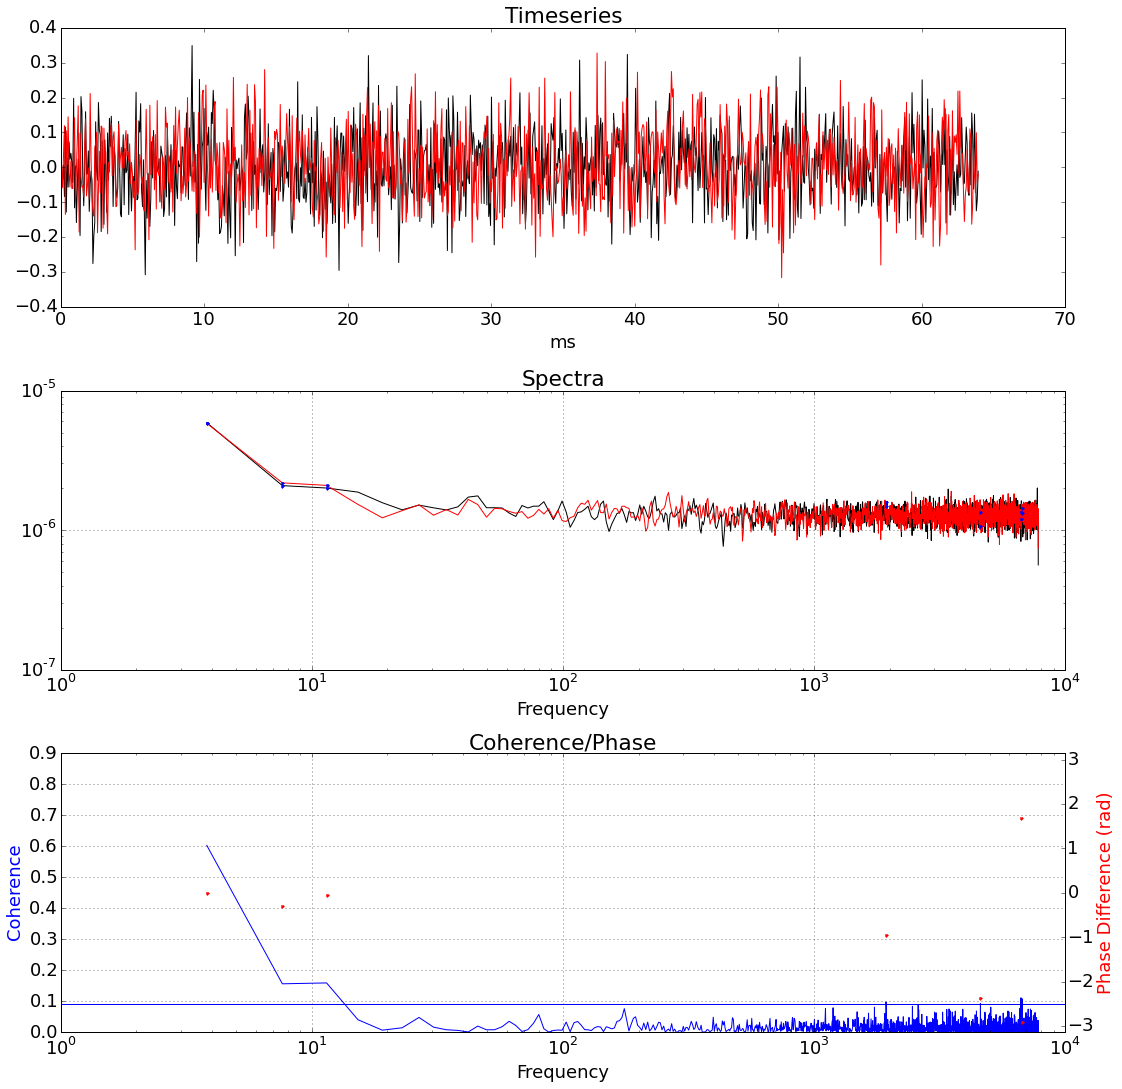

In [56]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+ts1/10.,red+ts2/10.)
cs.calculate(NFFT=2**12)
cs.plot()

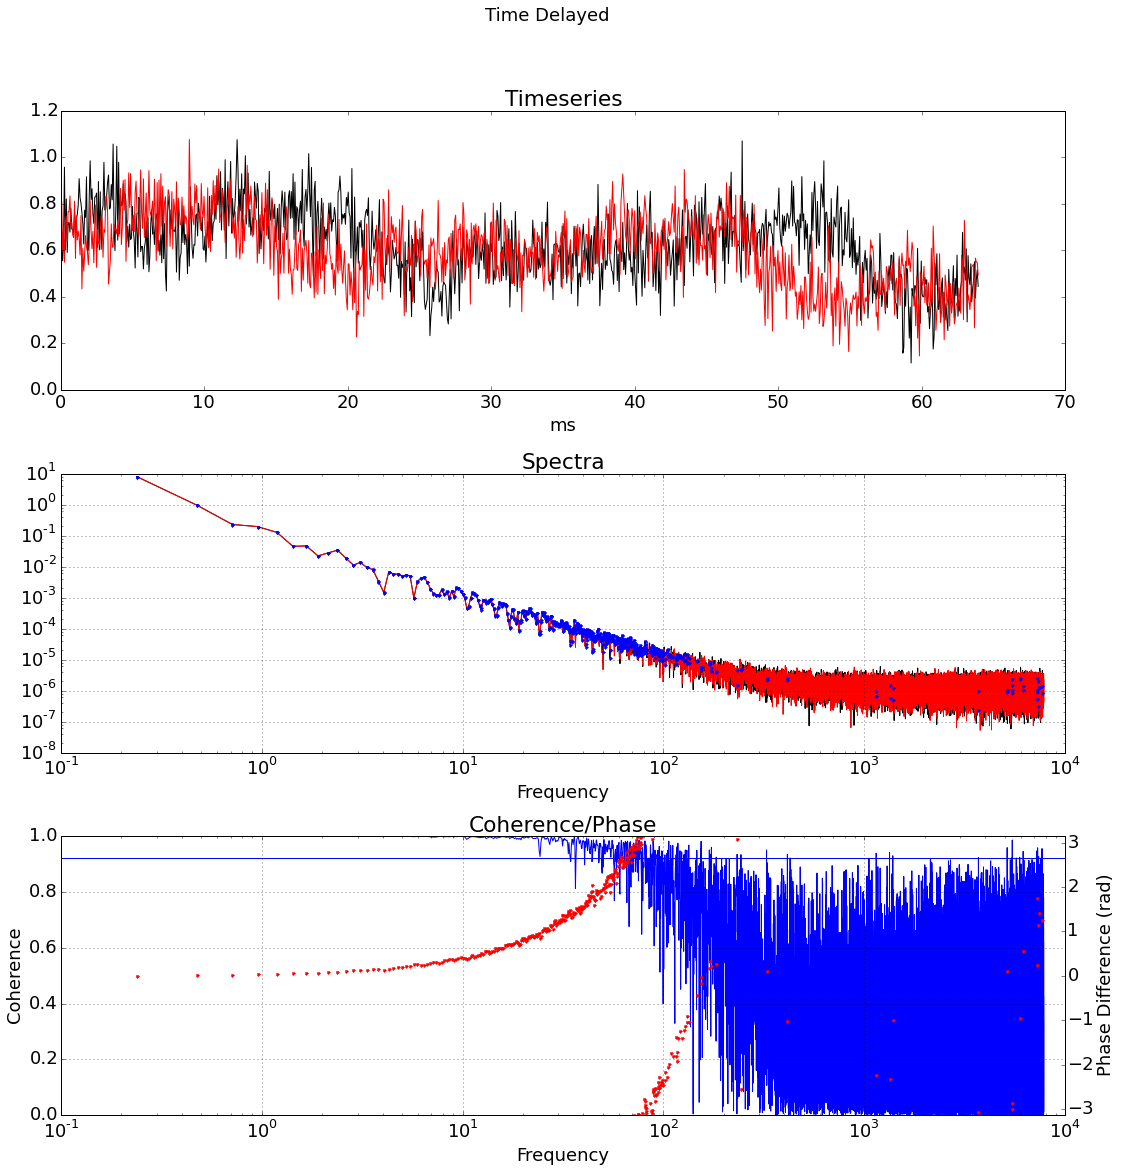

In [25]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+ts1/10.,np.roll(red,-100)+ts2/10.)
cs.plot()
suptitle('Time Delayed')

0.33801108541
0.146181948901


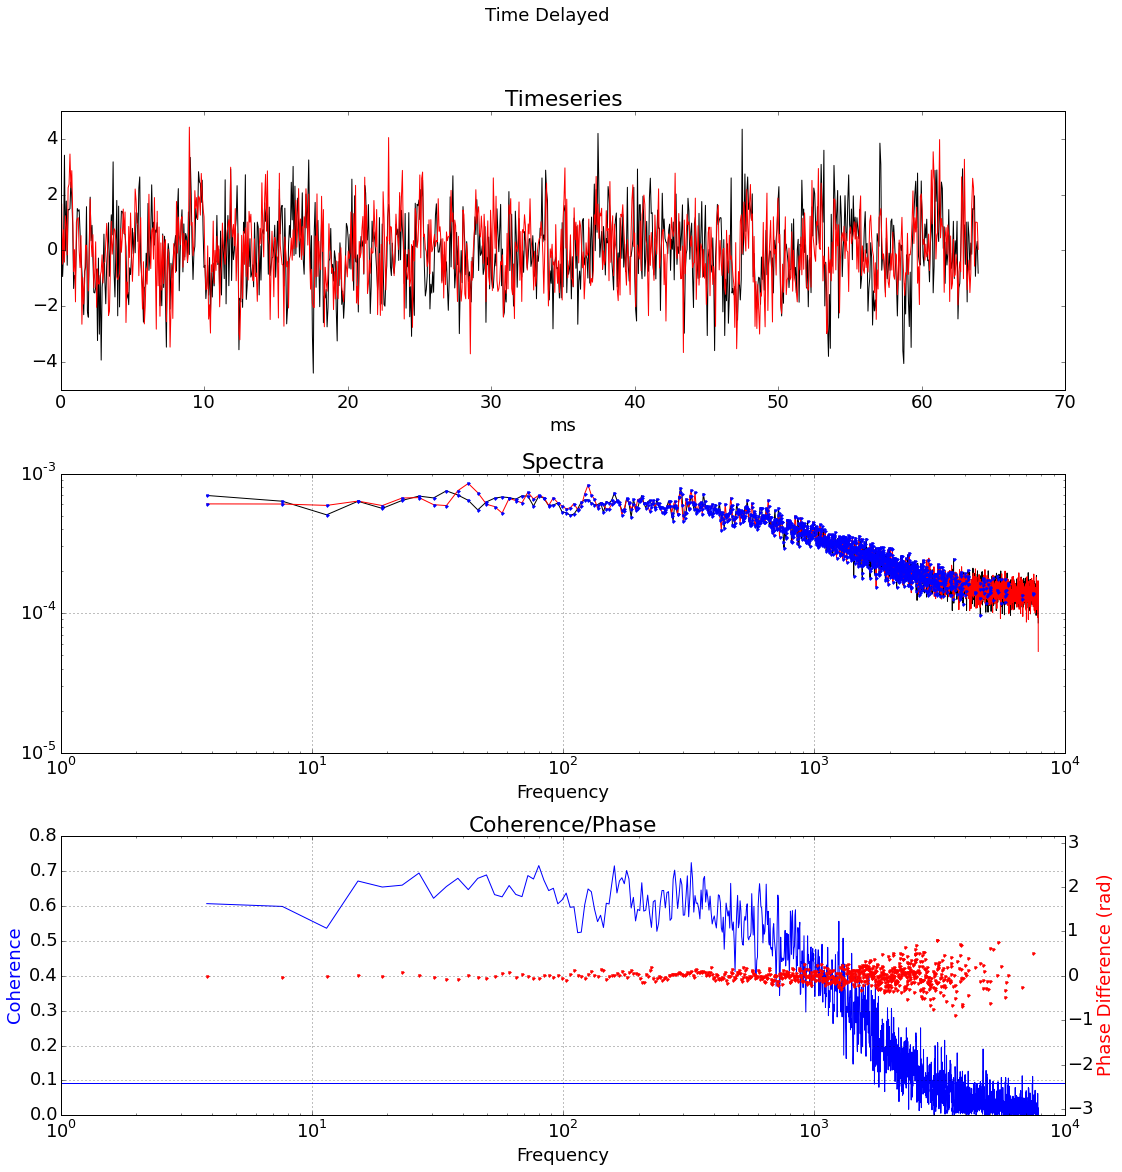

In [45]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(device+ts1,device+ts2)
cs.calculate(NFFT=2**12)
cs.plot()
suptitle('Time Delayed')